In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import matplotlib as mpl

mpl.rcParams['text.color'] = 'red'
mpl.rcParams['xtick.color'] = 'r'
mpl.rcParams['ytick.color'] = 'r'
mpl.rcParams['axes.labelcolor'] = 'red'

---
# Concept and uses of the inverse
---

In [84]:
m = 3
A = np.random.randn(m, m)
Ainv = np.linalg.inv(A)
idm = A @ Ainv
print(idm)
# Here we can see that diagonal elemnts are 1's and non diagonal elements are either 0 
# or very small values which are very closer to zero or computer rounding precesion error

[[ 1.00000000e+00 -1.04046997e-16  2.33416779e-17]
 [ 1.06827436e-16  1.00000000e+00  7.25677494e-17]
 [ 2.07071415e-16 -1.88265083e-16  1.00000000e+00]]


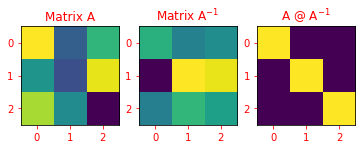

In [85]:
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix A$^{-1}$')

plt.subplot(133)

plt.imshow(idm)
plt.title('A @ A$^{-1}$')

plt.show()

---
### Code challange: MCA implementation
---

In [86]:
def MCA(mat):
    det = np.linalg.det(mat)
    if det == 0:
        return -1
    # minors matrix
    M = np.zeros(mat.shape)
    H = np.zeros(mat.shape)
    for i in range(len(mat)):
        for j in range(len(mat)):
            rows = [True]* len(mat)
            rows[i] = False
            cols = [True]* len(mat)
            cols[j] = False
            M[i,j] = np.linalg.det(mat[rows,:][:,cols])
            H[i,j] = (-1)**(i+j)
    C = H * M
    return C.T / det

In [87]:
# How above code is working
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

row = np.array([False, True, True])
col = np.array([True, False, True])
A[row,:][:,col]

array([[4, 6],
       [7, 9]])

In [88]:
m = 4
A = np.random.randn(m, m)
A_inv = MCA(A)
print(A @ A_inv)

[[ 1.00000000e+00  0.00000000e+00  2.22044605e-16  8.88178420e-16]
 [ 2.77555756e-16  1.00000000e+00  5.55111512e-17 -4.44089210e-16]
 [ 1.38777878e-17 -1.11022302e-16  1.00000000e+00 -2.22044605e-16]
 [ 1.11022302e-16 -1.11022302e-16 -6.59194921e-17  1.00000000e+00]]


In [89]:
print(np.linalg.inv(A) - A_inv)

[[ 2.77555756e-17 -2.22044605e-16  4.44089210e-16  2.22044605e-16]
 [-1.11022302e-16  2.22044605e-16 -1.11022302e-16 -8.88178420e-16]
 [ 2.22044605e-16 -4.44089210e-16  2.22044605e-16  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00 -4.44089210e-16 -2.22044605e-16]]


In [90]:
A_inv

array([[-0.18042961,  1.09676257, -1.71787304, -1.76217688],
       [ 0.73221635, -1.20707997,  0.97210027,  3.00539851],
       [ 0.57626953,  2.89742112, -1.93660451, -5.66953766],
       [-1.90954137, -3.1668232 , -0.38049977,  1.16192708]])

In [91]:
np.linalg.inv(A)

array([[-0.18042961,  1.09676257, -1.71787304, -1.76217688],
       [ 0.73221635, -1.20707997,  0.97210027,  3.00539851],
       [ 0.57626953,  2.89742112, -1.93660451, -5.66953766],
       [-1.90954137, -3.1668232 , -0.38049977,  1.16192708]])


---
# Computing the inverse via row reduction
---


In [92]:
m = 4

A = Matrix(np.random.randn(m, m), dtype='float')

# Augmented matrix
Aaug = Matrix(np.concatenate((A, np.eye(m)), axis=1))
print('Size of Aaug:',Aaug.shape)

Asol = Aaug.rref()[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

Size of Aaug: (4, 8)


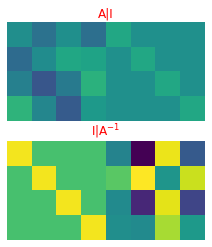

In [93]:
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug, dtype='float'), vmin=-5, vmax=5)
plt.title('A|I'), plt.axis('off')
plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()

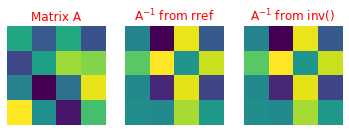

In [94]:
# square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A, dtype='float'))
plt.title('Matrix A')
plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref, dtype='float'))
plt.title('A$^{-1}$ from rref')
plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()')
plt.axis('off')
plt.show()

---
### Code challange: Inverse of a diagonal matrix
---

In [95]:
def inverse(mat):
    m = mat.shape[0]
    A = Matrix(np.concatenate((mat, np.eye(m)), axis=1))
    Asol = A.rref()[0]
    Ainvrref = Asol[:, m:m*2]
    return Ainvrref

In [96]:
# All the coresponding elements in the inverse matrix is reciprocal of the element.
# A [a 0] 
#   [0 d]
# A^-1 = [1/a 0]
#        [0 1/d]

A = np.diag((3, 4))
inverse(A)

Matrix([
[0.333333333333333,    0],
[                0, 0.25]])

In [97]:
B = np.diag(np.arange(1,6))
inverse(B)

Matrix([
[1.0,   0,                 0,    0,   0],
[  0, 0.5,                 0,    0,   0],
[  0,   0, 0.333333333333333,    0,   0],
[  0,   0,                 0, 0.25,   0],
[  0,   0,                 0,    0, 0.2]])

In [98]:
C = np.diag(np.arange(1, 4))
Cdiag = np.diag(C)
Cinv = np.array(inverse(C))
print('Original Diagonal Matrix')
print(C)
# elements will be squared as diagonal elements will mul with 
print('\nDiagonal Matrix * Diagonal elements')
print(C * Cdiag)

print('\nDiagonal Mat * Inverse Diag Mat')
print(C * Cinv)

Original Diagonal Matrix
[[1 0 0]
 [0 2 0]
 [0 0 3]]

Diagonal Matrix * Diagonal elements
[[1 0 0]
 [0 4 0]
 [0 0 9]]

Diagonal Mat * Inverse Diag Mat
[[1.00000000000000 0 0]
 [0 1.00000000000000 0]
 [0 0 1.00000000000000]]


---
# Left inverse and right inverse
---


In [99]:
# m>n for left inverse,
# m<n for right inverse
m = 6
n = 3

# Create matrices
A = np.random.randn(m, n)
AtA = A.T @ A
AAt = A @ A.T

# inspect ranks
print('Shape of A^TA:', np.shape(AtA) )
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) )
print('Shape of AA^T:', np.shape(AAt) )
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# Left inverse
Aleft = np.linalg.inv(AtA) @ A.T

# Right inverse
Aright = A.T @ np.linalg.inv(AAt)

# Now test!
I_left = Aleft @ A
I_right = A @ Aright

print(I_left), print(' ')
print(I_right), print(' ')

AtA_inv = np.linalg.inv(AtA)
AAt_inv = np.linalg.inv(AAt)

I_AtA   = AtA_inv @ AtA
I_AAt   = AAt_inv @ AAt

print(I_AtA), print(' ')
print(I_AAt)

Shape of A^TA: (3, 3)
Rank of A^TA: 3
Shape of AA^T: (6, 6)
Rank of AA^T: 3
[[ 1.00000000e+00  8.32667268e-17 -5.55111512e-17]
 [ 2.77555756e-17  1.00000000e+00 -5.55111512e-16]
 [ 2.77555756e-17  1.38777878e-17  1.00000000e+00]]
 
[[ 0.74950633  0.253738    0.36396655 -0.84841001  0.68186802 -0.08921154]
 [-1.10049239  0.06763993 -0.830134    0.06657302 -0.40370578  0.13701099]
 [ 0.70810063 -0.25935554  0.83905757  0.90845041 -0.77947866 -0.51756477]
 [-0.57544865  0.52657301 -0.85343413 -1.48946885  0.87264567  0.31667472]
 [-0.31046667  0.15985125 -0.36842405 -0.45083156  0.26225812  0.14634337]
 [-0.08684359 -0.58508376  0.32846526  1.5805499  -0.82076478  0.00985293]]
 
[[ 1.00000000e+00 -4.79357535e-18 -2.78700619e-17]
 [-5.16435976e-18  1.00000000e+00 -2.94777301e-16]
 [-7.64192295e-18  3.52354894e-17  1.00000000e+00]]
 
[[ 0.     -1.      4.     -4.     -1.5     2.75  ]
 [-0.5     0.      2.25   -2.5    -0.875   2.5   ]
 [ 0.125   1.      1.      0.5    -0.25   -2.3125]
 [-0.0

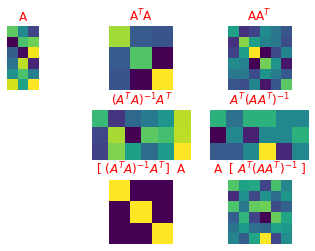

In [100]:
## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()


---
# The pseudoinverse, part 1
---


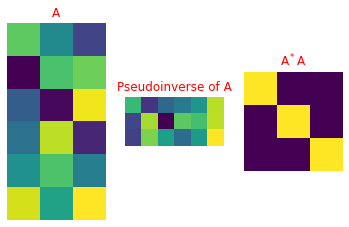

In [101]:
pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

In [102]:
# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))

rank = 49


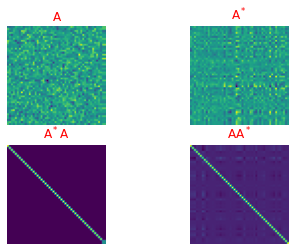

In [106]:
# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()

---
### Code challange: pseudo inverse of invertible matrix
---

In [104]:
m = 3
W = np.random.randn(m, m)
Winv = np.linalg.inv(W)
Wpinv = np.linalg.pinv(W)
print(np.round(Winv, 3))
print(' ')
print(np.round(Wpinv, 3))
print(' ')
print(np.round((Winv - Wpinv), 5))

[[ 0.078 -0.191 -0.673]
 [-0.188  0.546 -0.476]
 [-0.529 -0.109  0.257]]
 
[[ 0.078 -0.191 -0.673]
 [-0.188  0.546 -0.476]
 [-0.529 -0.109  0.257]]
 
[[ 0.  0.  0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
